In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [17]:
file_name = 'test'
file = file_name + '.h5'
hdf = h5py.File(file, 'r')
I = np.array(hdf['i_signal'])
Q = np.array(hdf['q_signal'])
I_mean = []
Q_mean = []
for i in range(len(I)):
    I_mean.append(I[i].mean())
    Q_mean.append(Q[i].mean())
ref = 5.87045 

x = []
for i in range(-int(len(I_mean)/2), int(len(I_mean)/2)): 
    x.append(ref + i*0.0002) 

begin = 90
end = 110

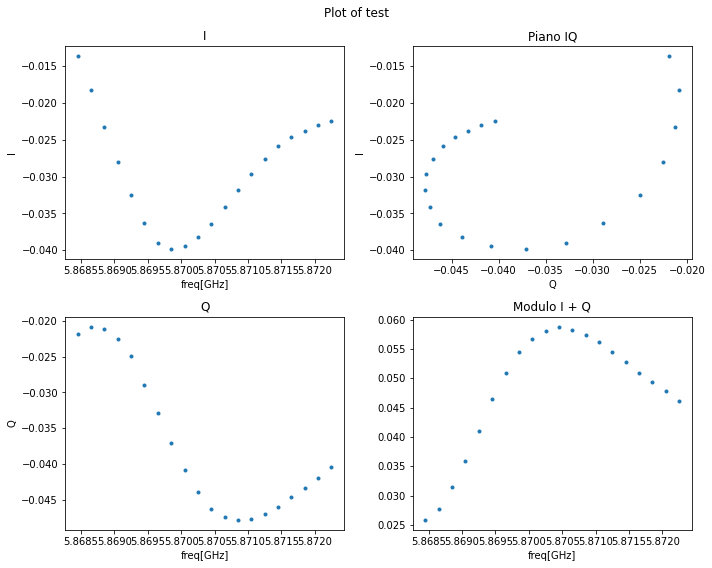

In [24]:
#%matplotlib notebook
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Plot of '+ file_name)
axs[0, 0].scatter(x[begin:end], I_mean[begin:end], marker='.')
axs[0, 0].set_title("I")
axs[0, 0].set_xlabel('freq[GHz]')
axs[0, 0].set_ylabel("I")
axs[1, 0].scatter(x[begin:end],Q_mean[begin:end], marker='.')
axs[1, 0].set_title("Q")
axs[1, 0].set_xlabel('freq[GHz]')
axs[1, 0].set_ylabel("Q")
axs[0, 1].scatter(Q_mean[begin:end], I_mean[begin:end], marker='.')
axs[0, 1].set_title("Piano IQ")
axs[0, 1].set_xlabel('Q')
axs[0, 1].set_ylabel("I")
axs[1, 1].scatter(x[begin:end],((np.array(Q_mean)**2+np.array(I_mean)**2)**0.5)[begin:end], marker='.')
axs[1, 1].set_title("Modulo I + Q")
axs[1, 1].set_xlabel('freq[GHz]')
#axs[0, 0].set_ylabel("AU")
fig.tight_layout()

In [15]:
fig.patch.set_facecolor('white')
fig.savefig('plot/'+file_name + '_zoom.png', dpi=300)

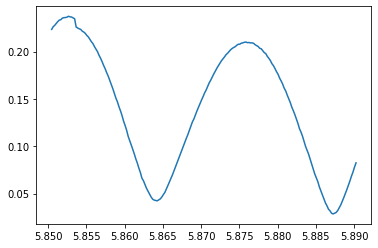

In [168]:
Q_new = np.array(Q_mean) - min(Q_mean) 
I_new = np.array(I_mean) - min(I_mean) 

plt.plot(x,(np.array(Q_new)**2+np.array(I_new)**2)**0.5)


In [31]:
def find_max_der(i,q, begin=90, end=110):
    der_i = np.diff(i[begin:end])
    der_q = np.diff(q[begin:end])
    max_i = np.argmin(der_i)
    max_q = np.argmin(der_q)
    index = round(begin + abs(max_q - max_i)/2)
    return max_i, max_q, index
print(find_max_der(I_mean,Q_mean))

(1, 6, 92)


In [32]:
x[92]

5.86885

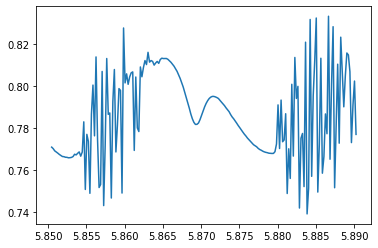

In [16]:
plt.plot(x, np.arctan((np.array(Q_mean)-1)/(np.array(I_mean)-1)))